In [1]:
%matplotlib nbagg

# Cálculo das probabilidades de fluxos no modelo da minha tese

In [113]:
from sympy import *
from sympy_recursive import Recursive
# Eviar mudança do sympy_recursive para python3
from sympy.abc import s, t

In [114]:
init_session()

IPython console for SymPy 1.1.2.dev (Python 3.5.2-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/dev



In [2]:
# Code sample from github.com/hejmsdz/sympy_recursive

n = Symbol('n')

# create the sequence
fib = Recursive('fib')
fib.index = n

# input the first items
fib[0] = 1
fib[1] = 1

# provide a recursive formula
fib[n] = fib[n-1] + fib[n-2]

# resolve it
explicit = fib.resolve()

# test
for i in range(10):
    value = explicit.subs(n, i).simplify()
    print("fib[{}] = {}".format(i, value))

fib[0] = 1
fib[1] = 1
fib[2] = 2
fib[3] = 3
fib[4] = 5
fib[5] = 8
fib[6] = 13
fib[7] = 21
fib[8] = 34
fib[9] = 55


In [8]:
def PI(f,z):
    return f(z)

def recPI(z,expr):
    return (4/z*sinh(z/4)*expr)**2

In [56]:
a = Symbol('a', positive=True)
expr = recPI(z,exp(-z/2))
aux = expr.rewrite(exp).expand()

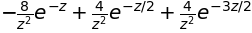

In [51]:
aux

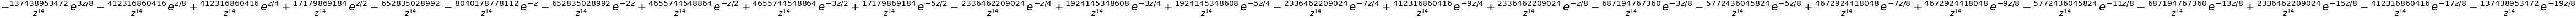

In [57]:
for i in range(2):
    replace = [[z,z/2]]
    expr = expr.subs(replace)
    expr = recPI(z,expr)
expr.rewrite(exp).expand()

In [129]:
def PIsy(z,j,n):
    return Product((2**(k+1)/z*sinh(z/2**(k+1)))**(2**k), (k, 1, n))

def PI(z,m,n):
    a = Symbol('beta',positive=True)
    aux = exp(-m*z)*Product((2**(k+1)/(a*z)*sinh(a*z/2**(k+1)))**(2**k), (k, 1, n)).doit()
    aux = aux.rewrite(exp).expand()
    return aux

In [139]:
P1 = PI(s,Symbol('j'),4)

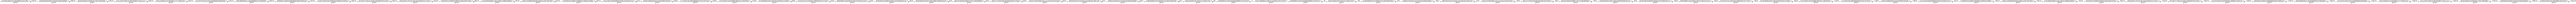

In [143]:
P1

In [140]:
P2l = diff(P1,s,2)

In [141]:
%%time
limit(P2l,s,0)

CPU times: user 1h 41min 21s, sys: 952 ms, total: 1h 41min 22s
Wall time: 1h 41min 24s


In [13]:
mathematica_code(PI(s,1,1))

'-8*Exp[-s]/s^2 + 4*Exp[-1/2*s]/s^2 + 4*Exp[-3/2*s]/s^2'

In [65]:
a, b, c = symbols('a beta j', positive=True)
expr = a*exp(-s*(j+b))/s**c
inverse_laplace_transform(expr,s,t)

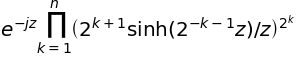

In [63]:
PIsy(z,Symbol('j'),n)

Cada $\sinh$ dará um binômio com $2^k+1$ termos, como são $n$ binômios com expoentes 2, 4, 8, ..., $2^n$. O total de termos é $\prod_{k=1}^{n}(2^k+1)$

In [142]:
def nterms(n):
    return Product(2**k+1, (k,1,n)).doit()

In [7]:
nterms(5)

In [8]:
%%time
a = inverse_laplace_transform(PI(s,2,1), s, t)

CPU times: user 2.23 s, sys: 0 ns, total: 2.23 s
Wall time: 2.31 s


In [9]:
%%time
b = inverse_laplace_transform(PI(s,2,2), s, t)

CPU times: user 11.9 s, sys: 3.26 ms, total: 11.9 s
Wall time: 11.9 s


In [10]:
%%time
c = inverse_laplace_transform(PI(s,2,3), s, t)

CPU times: user 2min 42s, sys: 40.8 ms, total: 2min 42s
Wall time: 2min 42s


In [24]:
def Gausian(x,xm,sd):
    return 1/sqrt(2*pi*sd*sd)*exp(-(x-xm)*(x-xm)/(2*sd*sd))

In [53]:
pa = plot(a,(t,0,4),show=False,line_color='black')
pb = plot(b,(t,0,4),show=False,line_color='blue')
pc = plot(c,(t,0,4),show=False,line_color='green')

In [54]:
g = plot(Gausian(t,2,0.275),(t,0,4),show=False,line_color='red')

In [55]:
pa.extend(pb)

In [56]:
pa.extend(pc)

In [57]:
pa.extend(g)

<IPython.core.display.Javascript object>


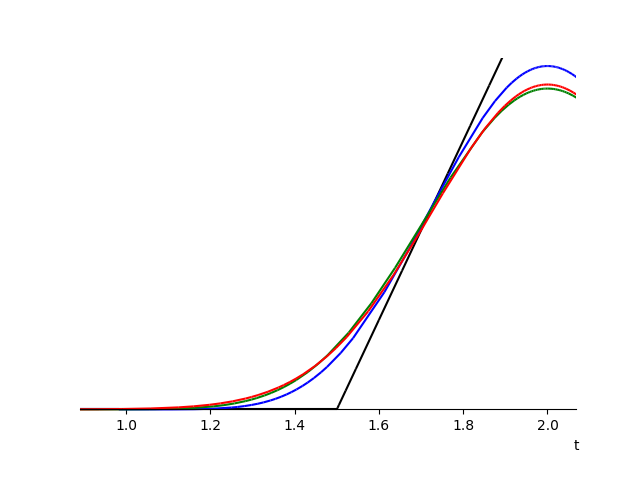

In [58]:
pa.show()

In [17]:
plotting.plot((a, line_color='red'),(b,line_color='blue'),(c,line_color='green'),(t,2-2,2+2))

SyntaxError: invalid syntax (<ipython-input-17-a2e737f18e65>, line 1)

In [61]:
import numpy as np

In [106]:

l = np.array(range(1,2))
def F(s):
    n = 1
    aux = np.product((2**(l+1)/s*sinh(s/2**(l+1)))**(2**l))
    return np.exp(-10*s)*aux

In [98]:
F(10)

In [107]:
# -*- coding: iso-8859-1 -*-

# laplace.py with mpmath
#   appropriate for high precision

# Talbot suggested that the Bromwich line be deformed into a contour that begins
# and ends in the left half plane, i.e., z \to \infty at both ends.
# Due to the exponential factor the integrand decays rapidly
# on such a contour. In such situations the trapezoidal rule converge
# extraordinarily rapidly.
# For example here we compute the inverse transform of F(s) = 1/(s+1) at t = 1
#
# >>> error = Talbot(1,24)-exp(-1)
# >>> error
#   (3.3306690738754696e-015+0j)
#
# Talbot method is very powerful here we see an error of 3.3e-015
# with only 24 function evaluations
#
# Created by Fernando Damian Nieuwveldt      
# email:fdnieuwveldt@gmail.com
# Date : 25 October 2009
#
# Adapted to mpmath and classes by Dieter Kadelka
# email: Dieter.Kadelka@kit.edu
# Date : 27 October 2009
#
# Reference
# L.N.Trefethen, J.A.C.Weideman, and T.Schmelzer. Talbot quadratures
# and rational approximations. BIT. Numerical Mathematics,
# 46(3):653 670, 2006.

from mpmath import mpf,mpc,pi,sin,tan,exp,sinh,product

# testfunction: Laplace-transform of exp(-t)
#def F(s):
#    return 1.0/(s+1.0)

class Talbot(object):

    def __init__(self,F=F,shift=0.0):
        self.F = F
        # test = Talbot() or test = Talbot(F) initializes with testfunction F

        self.shift = shift
        # Shift contour to the right in case there is a pole on the 
        #   positive real axis :
        # Note the contour will not be optimal since it was originally devoloped 
        #   for function with singularities on the negative real axis For example
        #   take F(s) = 1/(s-1), it has a pole at s = 1, the contour needs to be 
        #   shifted with one unit, i.e shift  = 1. 
        # But in the test example no shifting is necessary

        self.N = 24
        # with double precision this constant N seems to best for the testfunction
        #   given. For N = 22 or N = 26 the error is larger (for this special
        #   testfunction).
        # With laplace.py:
        # >>> test.N = 500
        # >>> print test(1) - exp(-1)
        # >>> -2.10032517928e+21
        # Huge (rounding?) error!
        # with mp_laplace.py
        # >>> mp.dps = 100
        # >>> test.N = 500
        # >>> print test(1) - exp(-1)
        # >>> -5.098571435907316903360293189717305540117774982775731009465612344056911792735539092934425236391407436e-64

    def __call__(self,t):
    
        if t == 0:
            print("ERROR:   Inverse transform can not be calculated for t=0")
            return ("Error");
          
        # Initiate the stepsize
        h = 2*pi/self.N
 
        ans =  0.0
        # parameters from
        # T. Schmelzer, L.N. Trefethen, SIAM J. Numer. Anal. 45 (2007) 558-571
        c1 = mpf('0.5017')
        c2 = mpf('0.6407')
        c3 = mpf('0.6122')
        c4 = mpc('0','0.2645')

      # The for loop is evaluating the Laplace inversion at each point theta i
      #   which is based on the trapezoidal rule
        for k in range(self.N):
            theta = -pi + (k+0.5)*h
            z = self.shift + self.N/t*(c1*theta/tan(c2*theta) - c3 + c4*theta)
            dz = self.N/t * (-c1*c2*theta/sin(c2*theta)**2 + c1/tan(c2*theta)+c4)
            ans += exp(z*t)*self.F(z)*dz
          
        return ((h/(2j*pi))*ans).real


ImportError: cannot import name 'product'

In [101]:
error = Talbot()

In [102]:
error(10)

AttributeError: 'mpc' object has no attribute 'sinh'

In [103]:
aux

NameError: name 'aux' is not defined

In [104]:
error.F(10)